# Fake News Exploratory Data Analysis

In [65]:
import pandas as pd
import regex as re
import itertools

Get subset of FakeNewCorpus data set.

In [66]:
# Import 250 articles as pandas df
data = pd.read_csv('https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv', dtype={"content": "string"}, index_col=0) 
data.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


### Cleaning and preprocessing

We define a function for cleaning our dataset

In [67]:
import numpy as np
import pandas as pd
from cleantext import clean
import matplotlib.pyplot as plt

import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import time

In [68]:

# RegEx patterns, catches expressions as var-names imply.
mail_pattern = re.compile(r"(?P<Mails>[w\.-]+@[\w\.-]+\.[\w]+)")
url_pattern = re.compile(r"(?P<URL>(?:(?:https?|ftp):[/][/])?[\w/\-?=%.]+\.[\w/\-&?=%.]+)")
date_pattern = re.compile(r"([\d]{1,2}[\/|\-][\d]{1,2}(?:[\/|\-][\d]{2,4})?|[\d]{2,4}[\/|\-][\d]{1,2}[\/|\-][\d]{1,2}|(?:january|february|march|april|may|june|july|august|september|october|november|december)[\s][\d]{1,2}[a-z][a-z](?:\s[\d]{2,4})|[\d][\d]\w?\w?\sof\s(?:january|february|march|april|may|june|july|august|september|october|november|december)(?:\s[\d]{2,4})?|(?:january|february|march|april|may|june|july|august|september|october|november|december)\s\d\d?\w?\w?,?(?:\s\d{2,4})?)")
num_pattern = re.compile(r"[a-zA-Z]*\d+[a-zA-Z]*") 
punct_remove = re.compile(r"[a-zA-Z]*[^a-zA-Z\s]+[a-zA-Z]*")
white_space = re.compile(r"[\s]+|\n+")

def clean_string(st):
    s1 = st.lower()
    s2 = mail_pattern.sub(" mail ", s1)
    s3 = url_pattern.sub(" url ", s2)
    s4 = date_pattern.sub(" date ", s3)
    s5 = num_pattern.sub(" num ", s4)
    s6 = punct_remove.sub(" ", s5)
    s7 = white_space.sub(" ", s6)
    return s7

In [69]:
data['content'] = data['content'].apply(clean_string)

In [70]:
data['content'].head()

0    sometimes the power of christmas will make you...
1    awakening of num strands of dna with movie of ...
2    never hike a friday the num fan film usa num n...
3    when a rare shark was scientists were left blu...
4    donald trump has the unnerving ability to abil...
Name: content, dtype: object

Define functions for preprocessing

In [71]:
def tokenizer():
    def tokenize(str):
        return nltk.word_tokenize(str)
    return tokenize

In [72]:
def stopwords_remover():
    stop = stopwords.words('english')
    def remove_stopwords(tokenlist):
        return list(filter(lambda x : x not in stop, tokenlist))
    return remove_stopwords

In [73]:
def token_stemmer():
    stemmer = PorterStemmer()
    def stem_tokenlist(tokenlist):
        return [stemmer.stem(token) for token in tokenlist]
    return stem_tokenlist

Tokenize, remove stopwords and compute vocabulary reduction rate

In [74]:
data['content'] = data['content'].apply(tokenizer()) # tokenize    
vocab = set(itertools.chain.from_iterable(data['content'])) # get vocabulary
data['content'] = data['content'].apply(stopwords_remover()) # remove stopwords
vocab_no_stopwords = set(itertools.chain.from_iterable(data['content'])) # get vocabulary
print("Reduction rate of removing stopwords: " + str(1 - len(vocab_no_stopwords)/ len(vocab)))

data['content'] = data['content'].apply(token_stemmer())
vocab_stemmed = set(itertools.chain.from_iterable(data['content']))
print("Reduction rate of stemming: " + str(1 - len(vocab_stemmed)/len(vocab_no_stopwords)))


Reduction rate of removing stopwords: 0.009916851018384354
Reduction rate of stemming: 0.34717620772016333


### Visualization of data set

In [75]:
import numpy as np
import matplotlib.pyplot as plt

We define functions for visualizations

In [76]:
def pair_keyword_type(keyword, dataframe): 
    dataarray = []
    for i in range(0, dataframe.__len__()): 
        instances = dataframe.content[i].count(str(keyword))
        dataarray.append((instances, dataframe.type[i]))
    return dataarray

In [77]:
def scatterplot_keyword_type(keyword, dataframe):
    pair_keyword_list = pair_keyword_type(keyword, dataframe)
    tuple_array = pair_keyword_type(keyword, dataframe)
    typearray = []
    countarray = []
    for i in range(0,pair_keyword_list.__len__()): 
        typearray.append(str(tuple_array[i][1]))
        countarray.append(tuple_array[i][0])
    fig = plt.figure(figsize=(10,5))
    ax =fig.add_axes([0,0,2,1])
    ax.scatter(typearray, countarray)
    plt.xticks(rotation = 'vertical')
    plt.show()

In [78]:
def barplot_keyword_type(keyword, dataframe):
    import pandas as pd # Didn't work without this, for some reason.
    tuple_array = pair_keyword_type(keyword, dataframe)
    rawdict = {}
    for i in range(0,len(tuple_array)):
        if tuple_array[i][1] not in rawdict:
            rawdict[tuple_array[i][1]] = [tuple_array[i][0]]
        else:
            rawdict[tuple_array[i][1]].append(tuple_array[i][0])

    meandict={}
    for i in rawdict: 
        meandict[i] = np.mean(rawdict[i])
    mediandict={}
    for i in rawdict: 
        mediandict[i] = np.median(rawdict[i])
    meanvals =[]
    medianvals=[]
    for i in mediandict:
        medianvals.append(mediandict[i])
    for i in meandict:
        meanvals.append(meandict[i])
    types = list(mediandict.keys())
    types = [str(i) for i in types]
    print(medianvals)
    print(meanvals)
    print(types)
    df = pd.DataFrame({
    'types': types,
    'meanvals': meanvals,
    'medianvals': medianvals
    })
    df.plot(x="types", y=["meanvals", "medianvals"], kind="bar", figsize=(10,5))


In [79]:
def boxplot_keyword_type(keyword, dataframe):
    tuple_array=pair_keyword_type(keyword, dataframe) 
    boxdata=[]
    dict = {}
    for i in range(0,len(tuple_array)):
        if tuple_array[i][1] not in dict:
            dict[tuple_array[i][1]] = [tuple_array[i][0]]
        else:
            dict[tuple_array[i][1]].append(tuple_array[i][0])
    for i in dict:
        boxdata.append(dict[i])
    fig = plt.figure(figsize=(10,5))
    ax =fig.add_axes([0,0,2,1])
    ax.boxplot(boxdata, labels = list(dict.keys()))
    plt.xticks(rotation = 'vertical')
    plt.show()

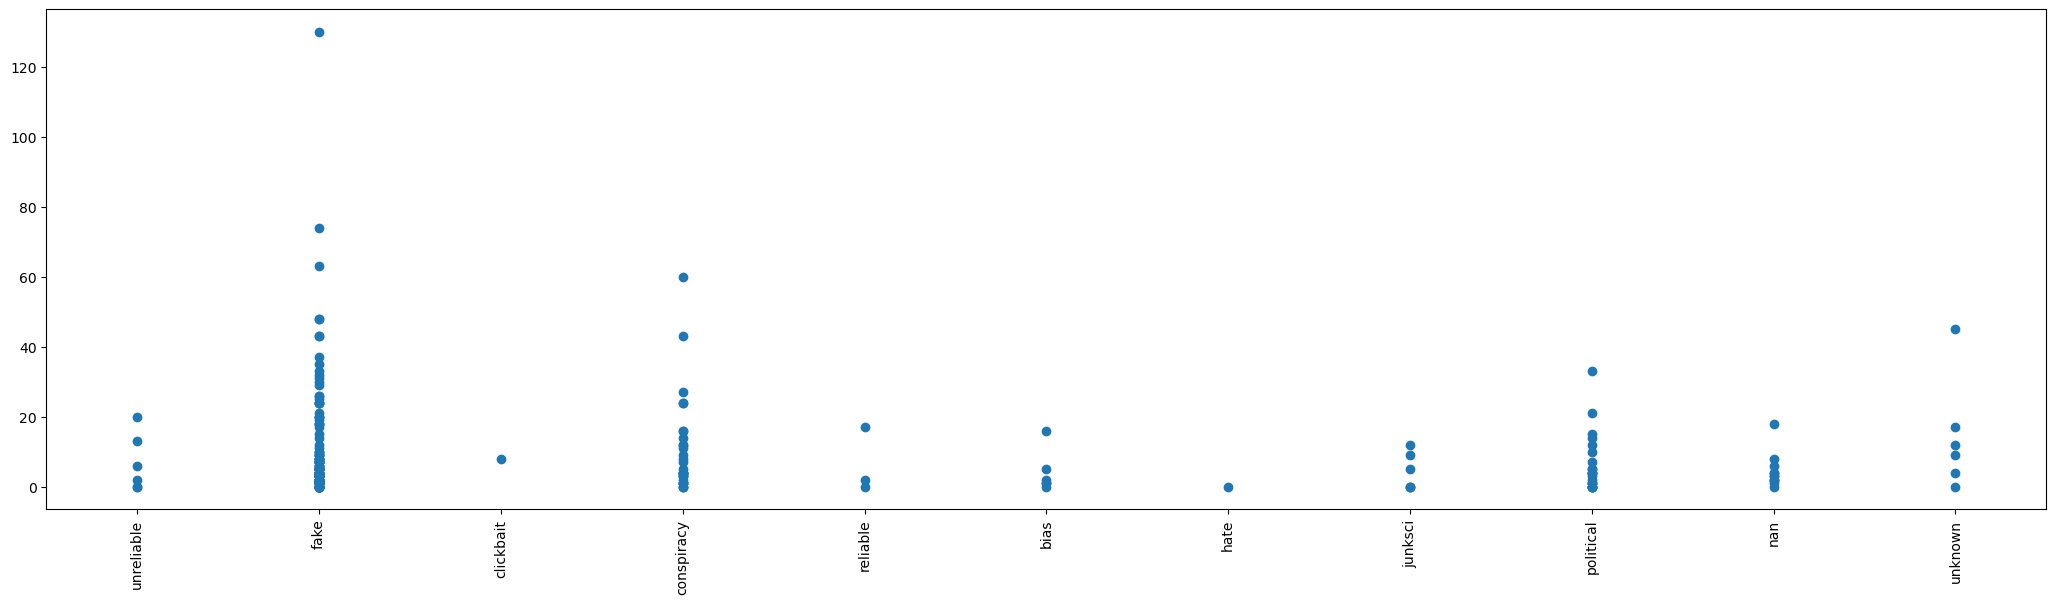

In [80]:
scatterplot_keyword_type("num", data)

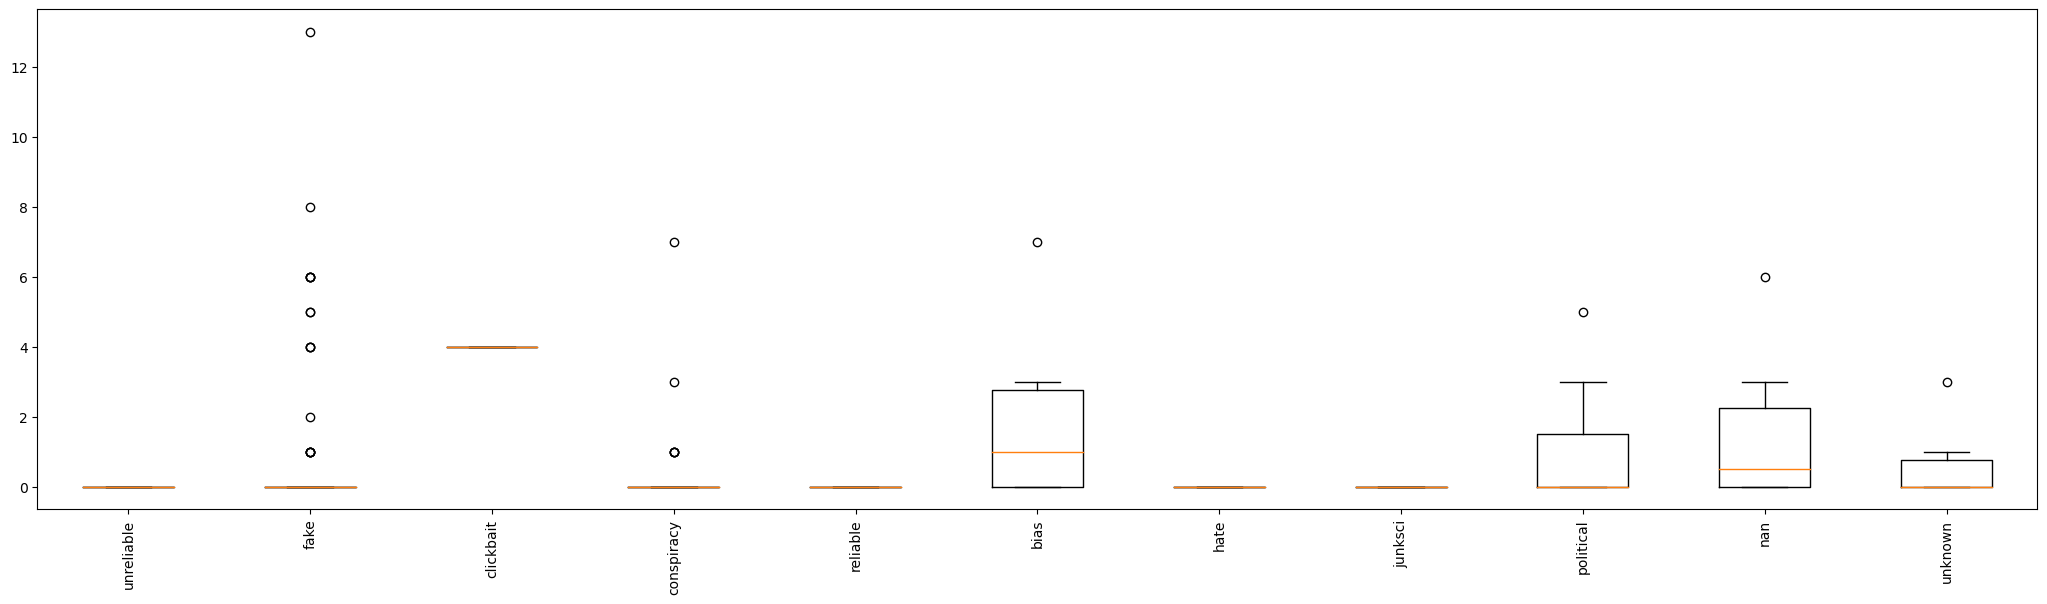

In [81]:
boxplot_keyword_type('trump', data)

[4.0, 3.0, 8.0, 4.0, 2.0, 1.5, 0.0, 2.5, 4.0, 3.0, 10.5]
[6.833333333333333, 9.116129032258064, 8.0, 10.419354838709678, 6.333333333333333, 4.166666666666667, 0.0, 4.333333333333333, 6.3478260869565215, 4.416666666666667, 14.5]
['unreliable', 'fake', 'clickbait', 'conspiracy', 'reliable', 'bias', 'hate', 'junksci', 'political', 'nan', 'unknown']


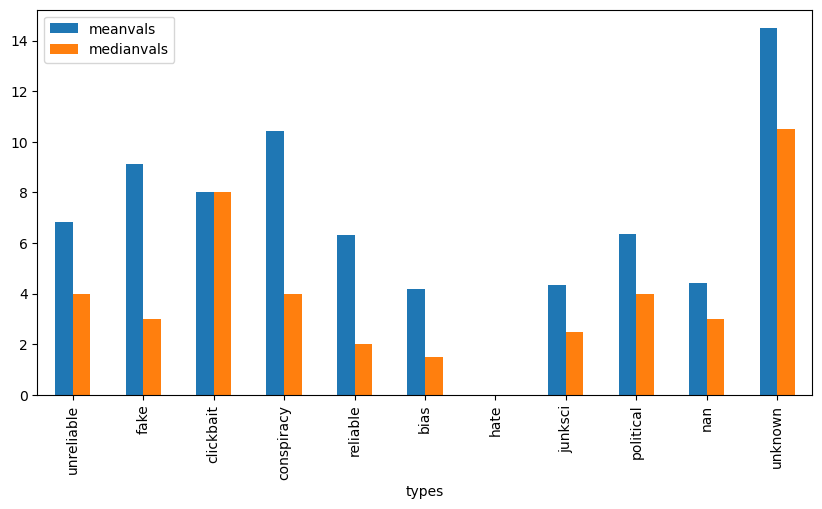

In [82]:
barplot_keyword_type('num', data) 